In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Ignore TensorFlow info messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

# --- Normalize data ---
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Keep images as 28x28x1 for CNN / demo.ipynb compatibility
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1,28,28,1)

x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


In [7]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9475 - loss: 0.1779 - val_accuracy: 0.9834 - val_loss: 0.0586
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9844 - loss: 0.0497 - val_accuracy: 0.9871 - val_loss: 0.0426
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9897 - loss: 0.0335 - val_accuracy: 0.9885 - val_loss: 0.0375
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9923 - loss: 0.0245 - val_accuracy: 0.9885 - val_loss: 0.0388
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9939 - loss: 0.0187 - val_accuracy: 0.9886 - val_loss: 0.0414


In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9893 - loss: 0.0358
Test Accuracy: 0.9893


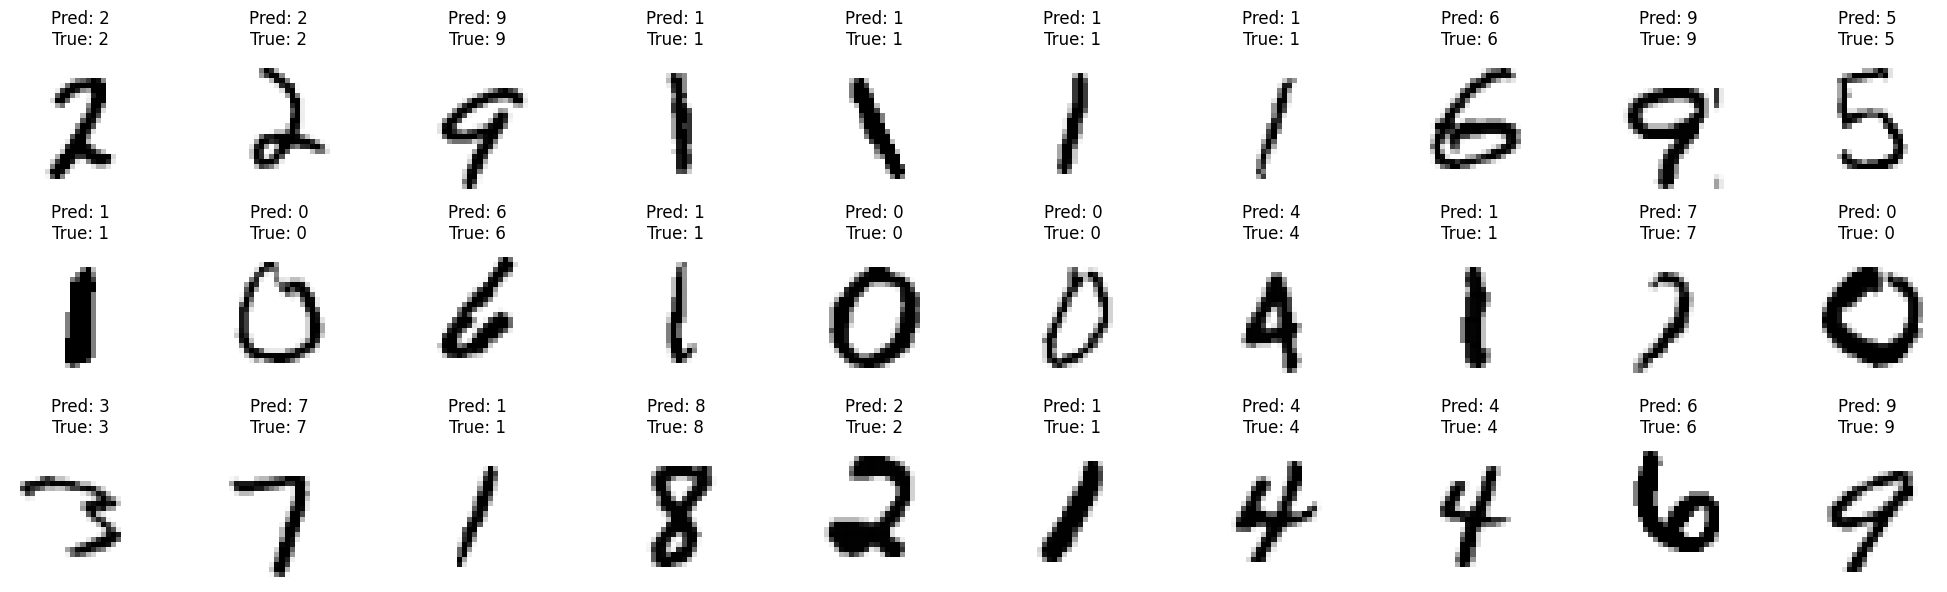

In [11]:
rows, cols = 3, 10
plt.figure(figsize=(20,6))
for i in range(rows*cols):
    idx = random.randint(0, x_test.shape[0]-1)
    img = x_test[idx].reshape(28,28)
    pred = np.argmax(model.predict(x_test[idx:idx+1], verbose=0))
    plt.subplot(rows, cols, i+1)
    plt.imshow(img, cmap='gray_r')
    plt.title(f"Pred: {pred}\nTrue: {y_test[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [12]:
def test_single(idx):
    img = x_test[idx]
    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(f"True label: {y_test[idx]}", color='g')

    preds = model.predict(img.reshape(1,28,28,1), verbose=0)
    pred_class = np.argmax(preds)
    confidence = float(np.max(preds))
    color = 'b' if pred_class == y_test[idx] else 'r'
    plt.xlabel(f"Prediction = {pred_class} (Confidence = {confidence:.2f})", color=color)
    plt.show()

In [13]:
model.save('mnist_model.keras')
print("Model saved as mnist_model.keras")

Model saved as mnist_model.keras
